<a href="https://colab.research.google.com/github/FaizaAli-DS/Spam_SMS-Email_Detection_CodSoft-_T2/blob/all-about-AI-and-Data-Science/Spam_SMS_Detection_CodSoft__T2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



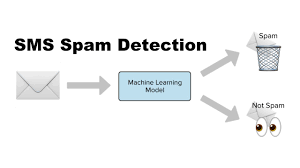
* Author: Faiza Ali<br>
* How to contact: https://www.linkedin.com/in/faizaali-ds/ <br>
* This project is part of my Internship Task
* Techniques: Naive Bayes Classifier and NLP


Lets get start!
👉👉👉<br>



# Import all required Python Libraries

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords

# Read the dataset , I have placed on google drive

In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/spam.csv", encoding='ISO-8859-1')

In [ ]:
train_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Data Cleaning


### 1. Drop all the unwanted colums

In [ ]:
#we will drop the unwanted columns
drop_column = {'Unnamed: 2','Unnamed: 3','Unnamed: 4'}
train_data.drop(columns = drop_column,axis=1,inplace=True)

### 2. Lets rename the columns properly

In [ ]:
names = {"v1":"Email_Type","v2":"Email_content"}
train_data.rename(columns = names,inplace=True)

### 3.Check the null values

In [ ]:
train_data.info() #2 clumns and 5572 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Email_Type     5572 non-null   object
 1   Email_content  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
# Befor any training first check the null values
train_data.isnull().sum()

Email_Type       0
Email_content    0
dtype: int64

### 4.Check NAN values

In [ ]:
# Some time dataset conatin NAN value , so need to check these values
train_data.isna().sum()

Email_Type       0
Email_content    0
dtype: int64

In [ ]:
train_data

,Email_Type,Email_content
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
#filtered_data = train_data[train_data['Email_Type'] == 0][['num_characters', 'num_words', 'num_sentences']]
#filtered_data = filtered_data.dropna()
#filtered_data.describe()

### 4. Check the dublicate vale

In [ ]:
train_data.duplicated().sum()

403

### 5. Remove all th dubilcate rows from the dataset

In [ ]:
#ohhhh , we have 403 dublicate vales , Dont worry, lets fix the error to clean the dataset
train_data.drop_duplicates(inplace=True)

In [ ]:
train_data.head() # check wether columns are renamed ?

,Email_Type,Email_content
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
train_data.describe()

,Email_Type,Email_content
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


# Expolatory Data Analysis

## Data Visualization

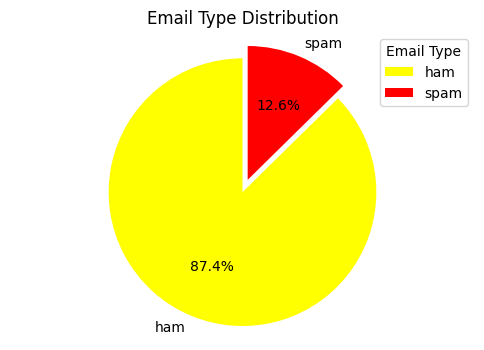

In [ ]:
email_type_counts = train_data['Email_Type'].value_counts()
colors = ['yellow', 'red']
explode = (0, 0.1)
plt.figure(figsize=(6, 4))  # Adjust the figure size
plt.pie(email_type_counts, labels=['ham', 'spam'], autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)
plt.title('Email Type Distribution')
plt.legend(title='Email Type', loc='upper right', labels=['ham', 'spam'])
plt.axis('equal')
plt.show()

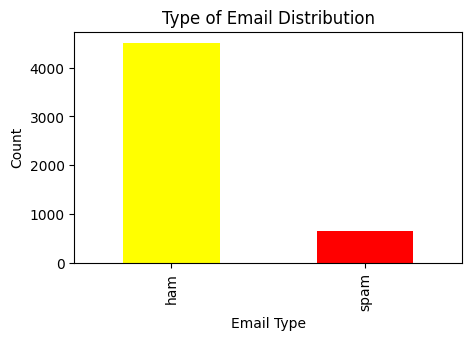

In [ ]:
train_data['Email_Type'] = train_data['Email_Type'].apply(lambda x: x.lower())
train_data['Email_Type'].value_counts().plot(kind='bar', color=['yellow', 'red'], figsize=(5, 3))
plt.title('Type of Email Distribution')
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.show()

**This is an imbalanced data 😒**

Now let’s find out :

1) No. of characters in the data
2) No. of words in the data
3) No. of sentences in the data

create 3 new columns in the data depicting the **no. of character**, **words** and **sentences**.

In [ ]:
#natural language tool kit
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

### 1. Get the number of characters

In [ ]:
train_data['num_characters']=train_data['Email_content'].apply(len)
train_data.head()

,Email_Type,Email_content,num_characters
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
from nltk.tokenize import word_tokenize
train_data['Email_content'].apply(lambda x: nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: Email_content, Length: 5169, dtype: object

### 2. Get the number of words :


In [ ]:
from nltk.tokenize import word_tokenize
train_data['Email_content'].apply(lambda x: nltk.word_tokenize(x))

train_data['num_words']=train_data['Email_content'].apply(lambda x:len(nltk.word_tokenize(x)))
train_data.sample(5)

,Email_Type,Email_content,num_characters,num_words
4006,ham,I'm reaching home in 5 min.,27,8
3903,spam,Your 2004 account for 07XXXXXXXXX shows 786 un...,128,20
5152,ham,Idk. I'm sitting here in a stop and shop parki...,184,43
1857,ham,I hate when she does this. She turns what shou...,135,29
4216,ham,Will be office around 4 pm. Now i am going hos...,52,13


### 3. Get the number of sentences :



In [ ]:
train_data['num_sentences']=train_data['Email_content'].apply(lambda x: len(nltk.sent_tokenize(x)))
train_data.sample(5)

,Email_Type,Email_content,num_characters,num_words,num_sentences
2245,ham,How did you find out in a way that didn't incl...,70,16,1
1918,ham,Is fujitsu s series lifebook good?,34,7,1
4443,ham,COME BACK TO TAMPA FFFFUUUUUUU,30,5,1
2794,ham,How will I creep on you now? ;_;,32,11,2
1142,ham,Have you had a good day? Mine was really busy ...,80,19,2


## Describe the dataset for ‘Ham’ messages:


In [ ]:
train_data[train_data['Email_Type']=='ham'][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


## Dataset for ‘Spam’ messages:




In [ ]:
train_data[train_data['Email_Type']=='spam'][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


***We can clearly see the spam messages are quite longer than the ham messages.***


<Axes: xlabel='num_characters', ylabel='Count'>

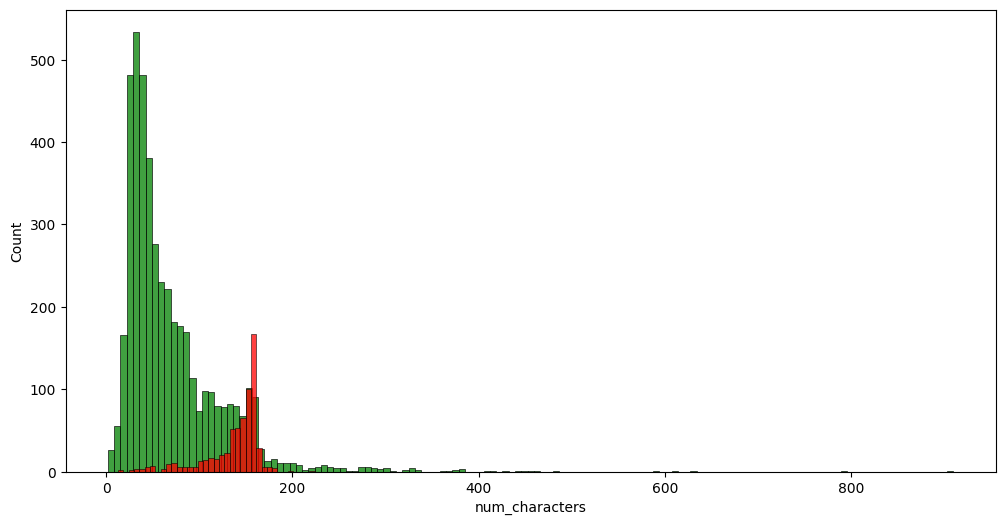

In [ ]:
#for characters plot a graph
plt.figure(figsize=(12,6))
sns.histplot(train_data[train_data['Email_Type']=='ham']['num_characters'],color='green')
sns.histplot(train_data[train_data['Email_Type']=='spam']['num_characters'],color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

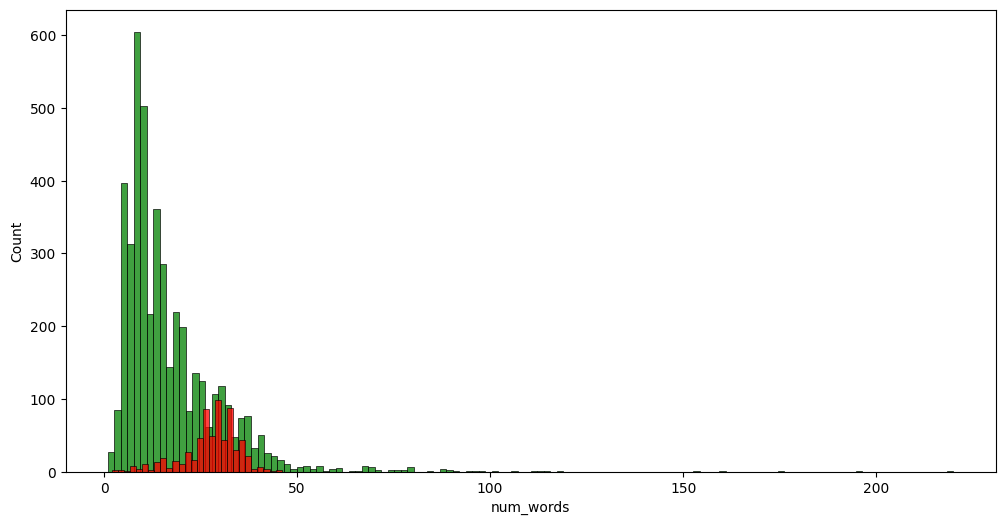

In [ ]:
#for words
plt.figure(figsize=(12,6))
sns.histplot(train_data[train_data['Email_Type']=='ham']['num_words'],color='green')
sns.histplot(train_data[train_data['Email_Type']=='spam']['num_words'],color='red')

## Heatmap for the correlation

<ipython-input-29-36ace15e4ba3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(),annot=True)


<Axes: >

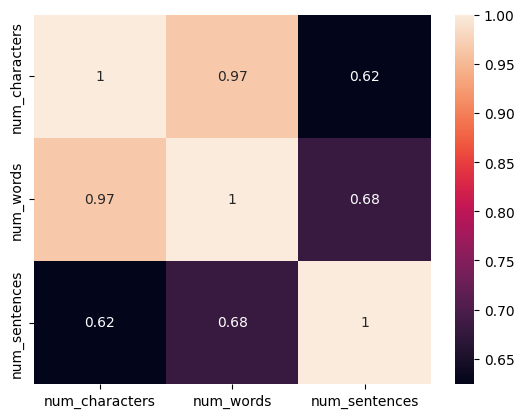

In [ ]:
sns.heatmap(train_data.corr(),annot=True)

# Data Preprocessing

In [ ]:
train_data.Email_Type = [0 if value=="ham" else 1 for value in train_data.Email_Type]

In [ ]:
train_data.head()

,Email_Type,Email_content,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


## Lets!, Split the Data for the training and testing

In [ ]:
X = train_data['Email_content']
y = train_data['Email_Type']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=3)

In [ ]:
def text_transform(Email_content):
    Email_content=Email_content.lower() #change to lowercase
    Email_content=nltk.word_tokenize(Email_content)
    y=[]
    for i in Email_content:
        if i.isalnum():
            y.append(i)

        y.clear()

    #for checking punctuations and stopwords
    for i in Email_content:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    Email_content=y[:]
    y.clear()

    #now stemming function
    for i in Email_content:
        y.append(ps.stem(i))

    #return y  --> returns as list
    return " ".join(y)

In [ ]:
nltk.download('stopwords')
stopwords.words('english')
len(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


179

In [ ]:
#now for punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# stemming
from nltk.stem.porter import PorterStemmer
ps =PorterStemmer()

In [ ]:
train_data['transformed_content']=train_data['Email_content'].apply(text_transform)

WordCloud for freq words in Email_content

In [ ]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

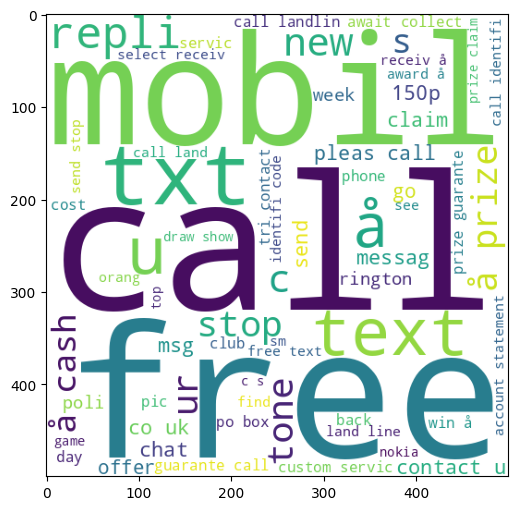

In [ ]:
#For Spam:
spam_wc=wc.generate(train_data[train_data['Email_Type']==1]['transformed_content'].str.cat(sep=""))
plt.figure(figsize=(10,6))
plt.imshow(spam_wc)

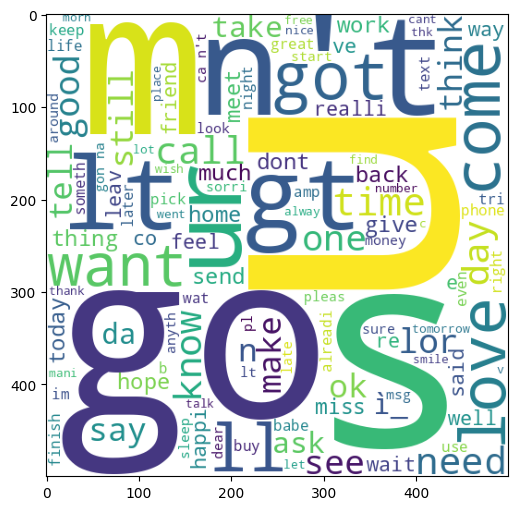

In [ ]:
#For Ham:
ham_wc=wc.generate(train_data[train_data['Email_Type']==0]['transformed_content'].str.cat(sep=""))
plt.figure(figsize=(10,6))
plt.imshow(ham_wc)

# Building model to train the dataset
input >> Categorical
output >> Numerical

But as we know in the Naive Bayes algorithm the input columns should be numerical so we have to convert (VECTORIZE) the column.

**How to vectorize:**
1. Bag of Words
2. TFIDF
3. Word2vec
I am using TFIDF vectorization that gives the best accuracy and precision score so we will be using it.

## Its time to perform TF-IDF vectorizer for feature extraction

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# TfidfVectorizer is a powerful tool for converting a collection of raw text documents into a matrix of TF-IDF
 #(Term Frequency-Inverse Document Frequency) features

tfidf_vectorizer = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True, max_features=5000, max_df=0.8)
X_train_matrix = tfidf_vectorizer.fit_transform(X_train)
X_test_matrix = tfidf_vectorizer.transform(X_test)

### Lets convert parse matrix to a dense array
To facilitate compatibility with machine learning algorithms that require dense arrays, such as scikit-learn classifiers, we convert sparse TF-IDF matrices to dense arrays.

In [ ]:
X_train_matrix = X_train_matrix.toarray()
X_test_matrix = X_test_matrix.toarray()

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

In [ ]:
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

In [ ]:
gnb.fit(X_train_matrix,y_train)
y_pred1= gnb.predict(X_test_matrix)
print('Accuracy score of Gaussian NB is: ',accuracy_score(y_test,y_pred1))
print('Confusion Matrix of Guassian NB is: ',confusion_matrix(y_test,y_pred1))
print('Precision score of the Gaussian NB is',precision_score(y_test,y_pred1))

Accuracy score of Gaussian NB is:  0.8665377176015474
Confusion Matrix of Guassian NB is:  [[776 118]
 [ 20 120]]
Precision score of the Gaussian NB is 0.5042016806722689


In [ ]:
mnb.fit(X_train_matrix,y_train)
y_pred2=mnb.predict(X_test_matrix)
print('Accuracy score of Multinomial NB is: ',accuracy_score(y_test,y_pred2))
print('Confusion Matrix of Multinomial NB is: ',confusion_matrix(y_test,y_pred2))
print('Precision score of the Multinomial NB is',precision_score(y_test,y_pred2))


Accuracy score of Multinomial NB is:  0.9690522243713733
Confusion Matrix of Multinomial NB is:  [[894   0]
 [ 32 108]]
Precision score of the Multinomial NB is 1.0


In [ ]:
bnb.fit(X_train_matrix,y_train)
y_pred3=bnb.predict(X_test_matrix)
print('Accuracy score of Bernoulli NB is: ',accuracy_score(y_test,y_pred3))
print('Confusion Matrix of Bernoulli NB is: ',confusion_matrix(y_test,y_pred3))
print('Precision score of the Bernoulli NB is',precision_score(y_test,y_pred3))

Accuracy score of Bernoulli NB is:  0.9758220502901354
Confusion Matrix of Bernoulli NB is:  [[894   0]
 [ 25 115]]
Precision score of the Bernoulli NB is 1.0


🙌 Hurrayy, all done

# Building a Website to use the model

In [ ]:
import pickle
pickle.dump(tfidf_vectorizer,open('/content/model.pkl','wb'))
pickle.dump(mnb,open('/content/model.pkl','wb'))

In [ ]:
!pip install streamlit
import streamlit as st
import pickle
import string
from nltk.corpus import stopwords
import nltk
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)
tfidf = pickle.load(open('/content/model.pkl','rb'))
model = pickle.load(open('/content/model.pkl','rb'))
st.title("Email/SMS Spam Classifier")
input_sms = st.text_area("Enter the message")
if st.button('Predict'):
    # 1. preprocess
    transformed_sms = transform_text(input_sms)
    # 2. vectorize
    vector_input = tfidf.transform([transformed_sms])
    # 3. predict
    result = model.predict(vector_input)[0]
    # 4. Display
    if result == 1:
        st.header("Spam")
    else:
        st.header("Not Spam")

!streamlit run app.py
!streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py



  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.243.220.11:8501

  Stopping...
  Stopping...
